# Lighthouse Indicium

In [2]:
import re
import pandas   as pd
import numpy    as np
import seaborn  as sns

from matplotlib import pyplot as plt

from IPython.core.display    import HTML
from IPython.display         import Image

## Mapa Mental de Hipóteses

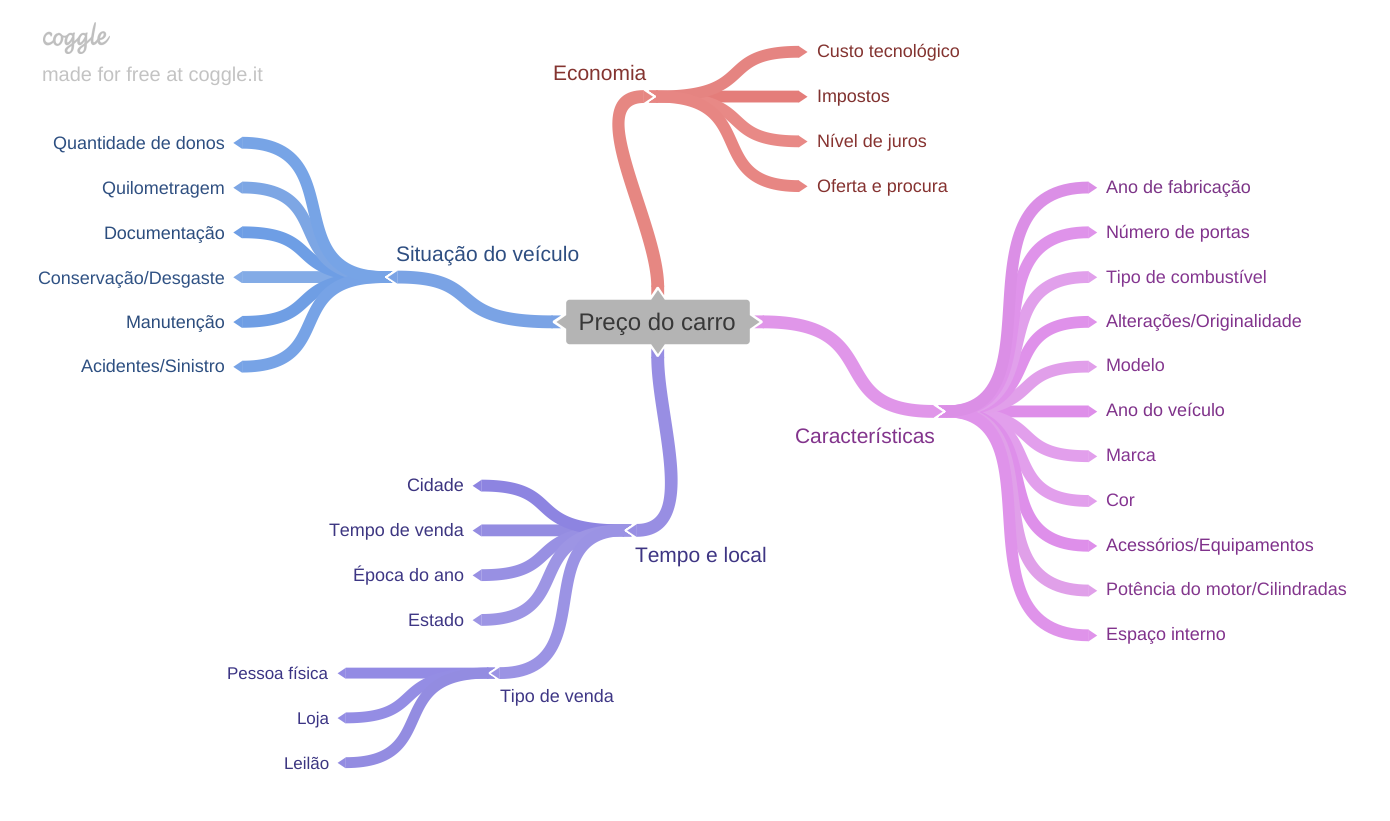

In [23]:
Image('../reports/figures/mind_map.png')

## Conferindo Cidades e Estados

Há no dataset cidades com estados incorretos, para isso é necessário verificar se as cidades realmente pertencem ao estado informado.

In [25]:
df2.loc[9802]

id                         100782370360602513820631340414980252519
num_fotos                                                      8.0
marca                                                         FIAT
modelo                                                        TORO
versao                        2.0 16V TURBO DIESEL VOLCANO 4WD AT9
ano_fabricacao                                                2019
ano_modelo                                                  2019.0
hodometro                                                  45523.0
cambio                                                  Automática
num_portas                                                       4
tipo                                                        Picape
blindado                                                         N
cor                                                         Branco
tipo_vendedor                                                   PF
cidade_vendedor                                       Bady Bas

Utilizando uma API podemos verificar as informações para cada combinação.

In [74]:
from __future__ import print_function
import time
import cloudmersive_validate_api_client
from cloudmersive_validate_api_client.rest import ApiException
from pprint import pprint

In [75]:
# Configure API key authorization: Apikey
configuration = cloudmersive_validate_api_client.Configuration()
configuration.api_key['Apikey'] = 'KEY'

In [108]:
# create an instance of the API class
api_instance = cloudmersive_validate_api_client.AddressApi(cloudmersive_validate_api_client.ApiClient(configuration))
input = cloudmersive_validate_api_client.ValidateCityRequest() # ValidateCityRequest | Input parse request

try:
    # Validate a City and State/Province combination, get location information about it
    api_response = api_instance.address_validate_city({"City": "Bady Bassitt",
                                                       "StateOrProvince": "São Paulo (SP)",
                                                       "CountryFullName": "Brazil"})
    pprint(api_response)
except ApiException as e:
    print("Exception when calling AddressApi->address_validate_city: %s\n" % e)

{'city': 'Bady Bassitt',
 'latitude': -20.9178969,
 'longitude': -49.4517911,
 'state_or_province': 'SP',
 'valid_city': True}


*A cidade Bady Bassitt não fica no estado do Rio de Janeiro.*

Por questões de tempo e limite de requisições permitidas na API, essa informação não será corrigida e análisada agora.

# ANÁLISE EXPLORATÓRIA DOS DADOS

In [5]:
df4 = pd.read_csv('../data/interim/dataset_selected.csv')

## Análise Bivariada

### H1. Carros com motores flex são mais caros.
**FALSA.** Carros com MOTORES FLEX são MAIS BARATOS que os outros.

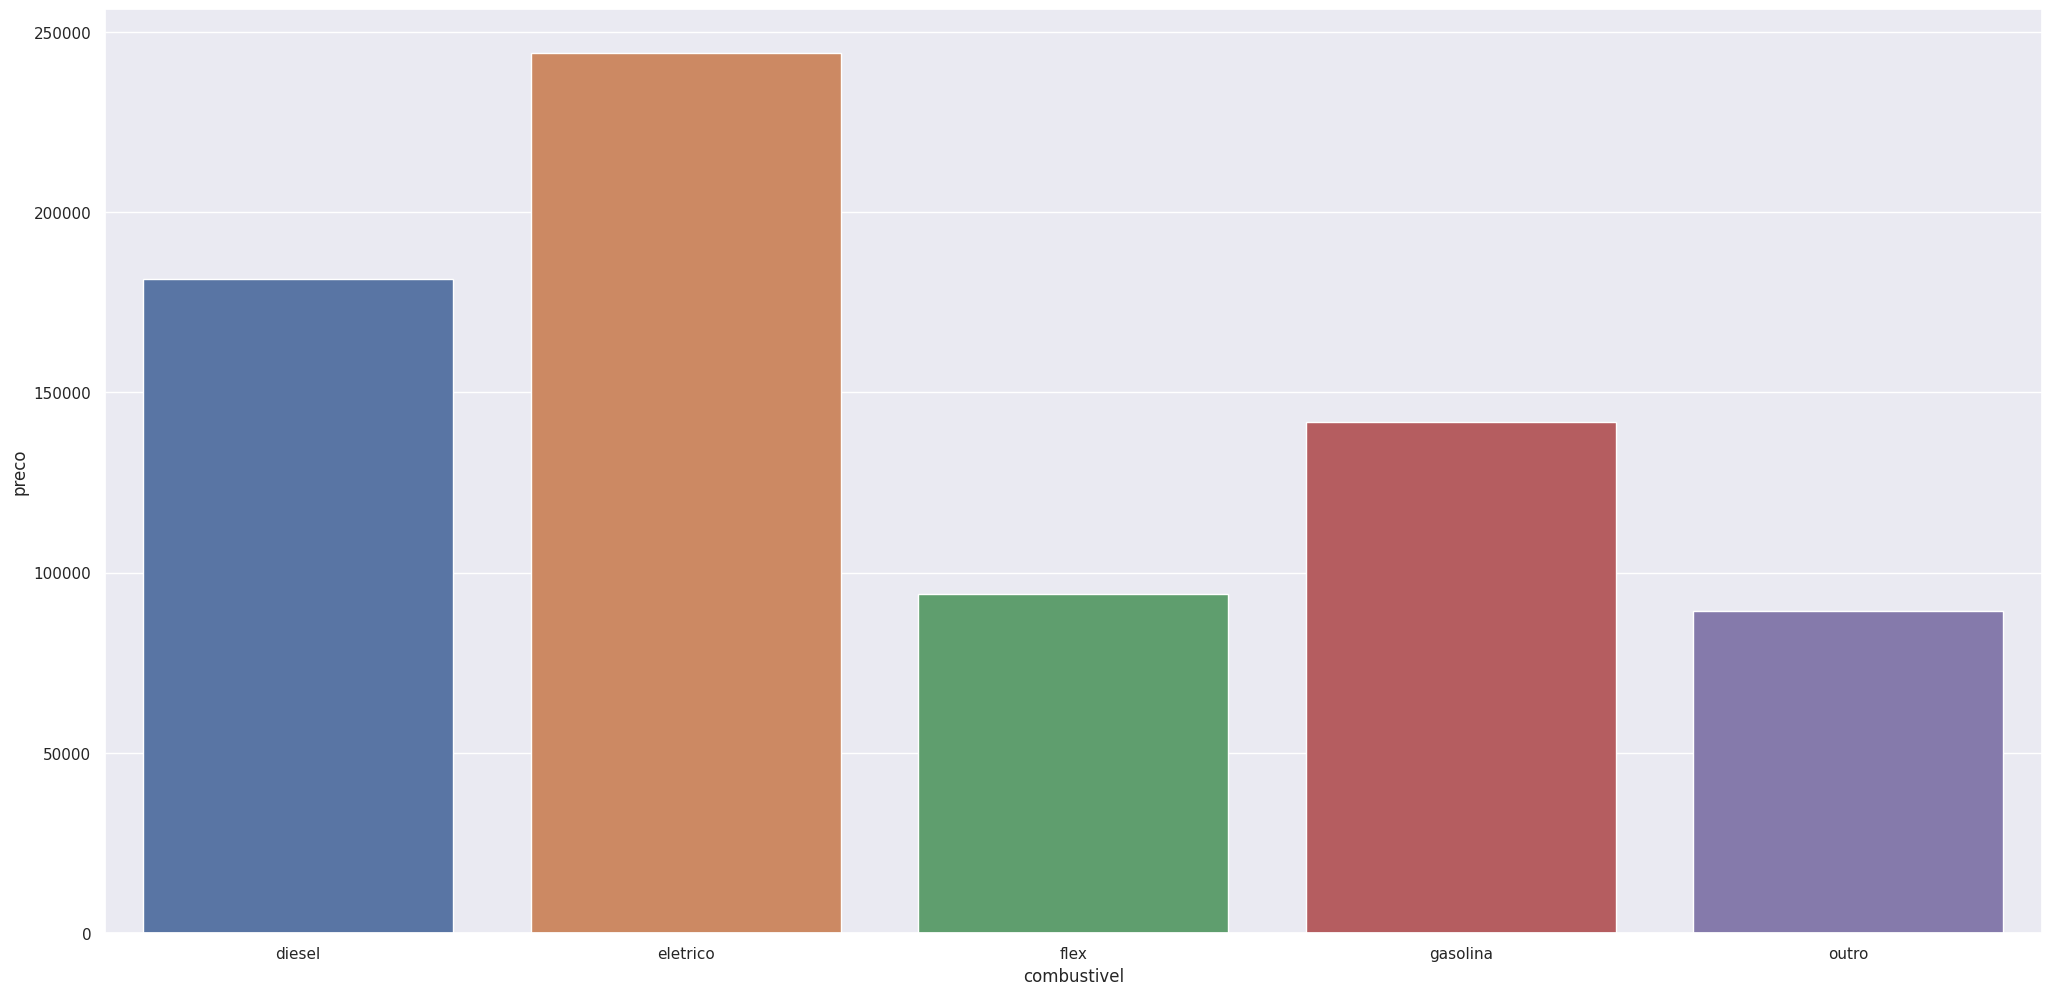

In [251]:
aux1 = df4[['combustivel', 'preco']].groupby('combustivel').median().reset_index()
sns.barplot(aux1, x='combustivel', y='preco');

### H2. Carros sem alterações (blindagem) são mais caros.
**FALSA.** Carros SEM BLINDAGEM são MAIS BARATOS.

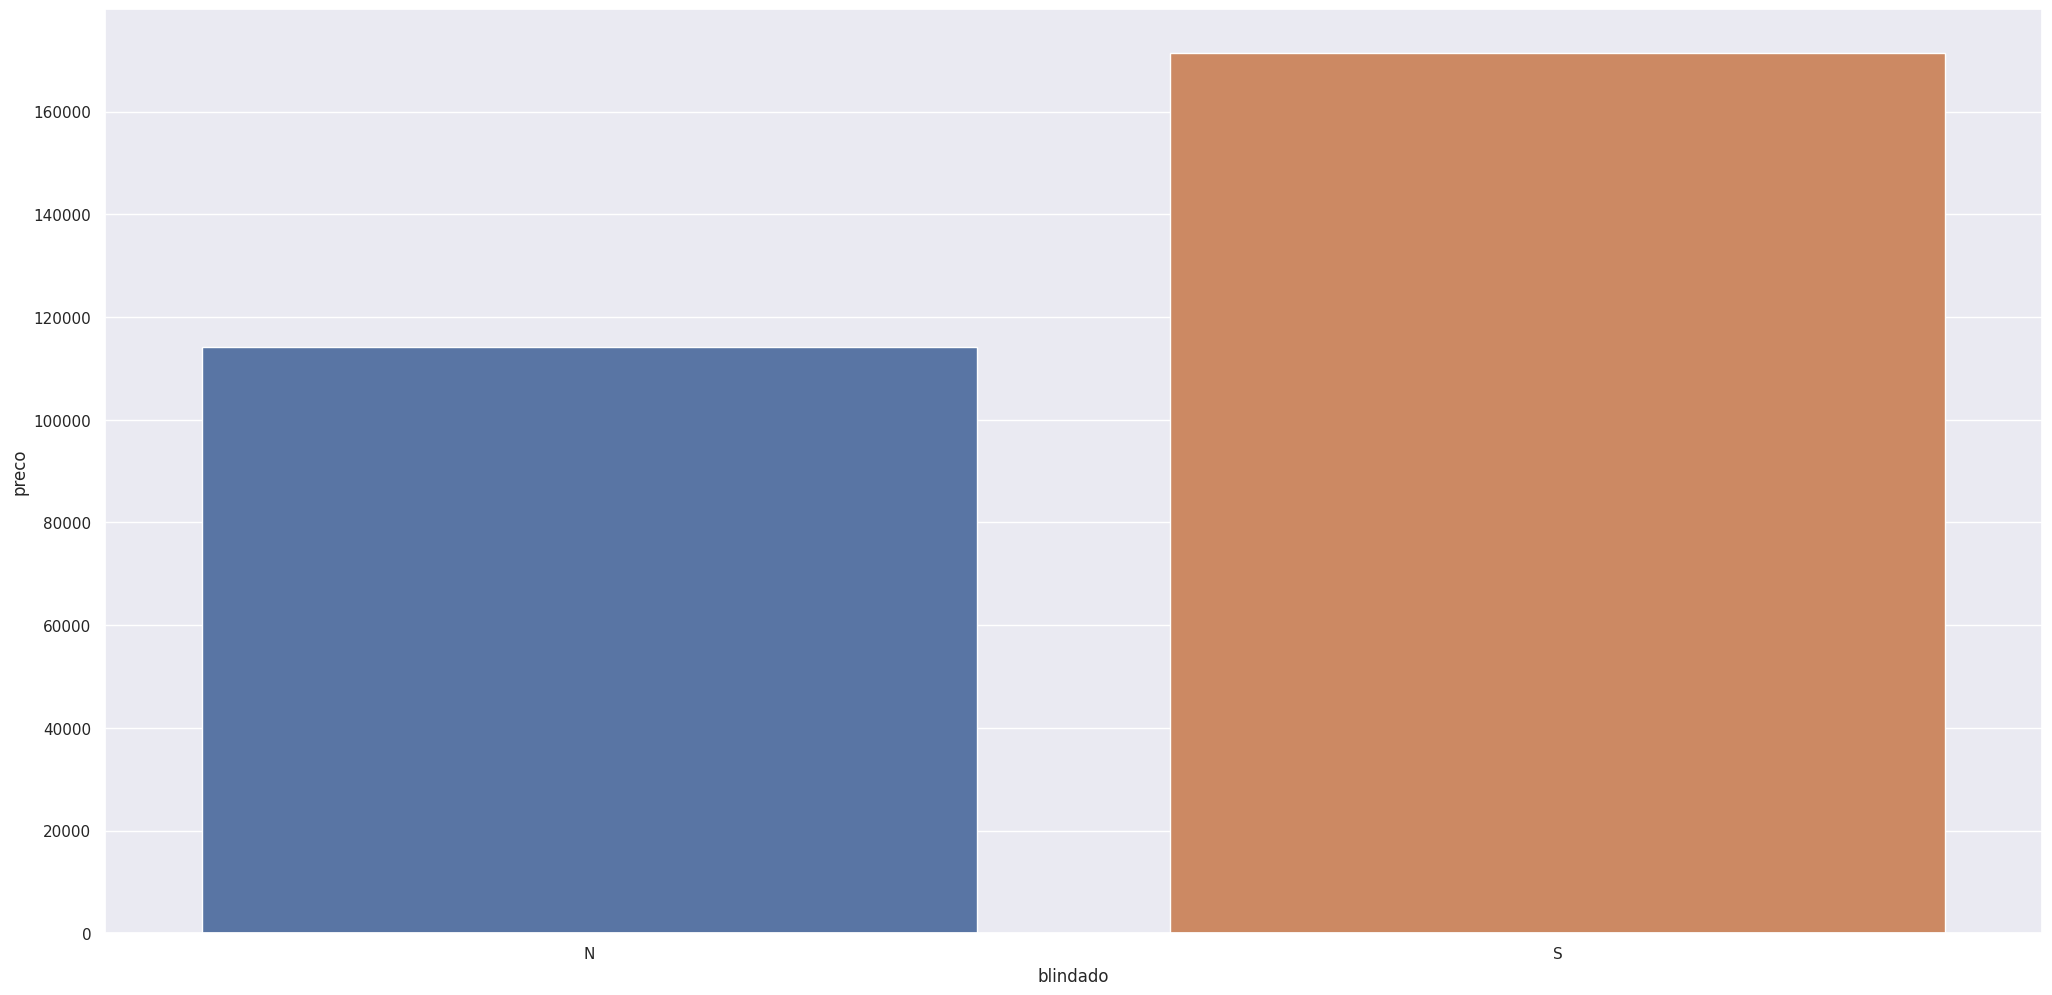

In [255]:
aux1 = df4[['blindado', 'preco']].groupby('blindado').median().reset_index()
sns.barplot(aux1, x='blindado', y='preco');

### H3. Carros com ano de fabricação mais recentes (>2015) são mais caros.
**VERDADEIRA.** Carros com ANO DE FABRICACÃO RECENTE (2011 em diante) são MAIS CAROS.

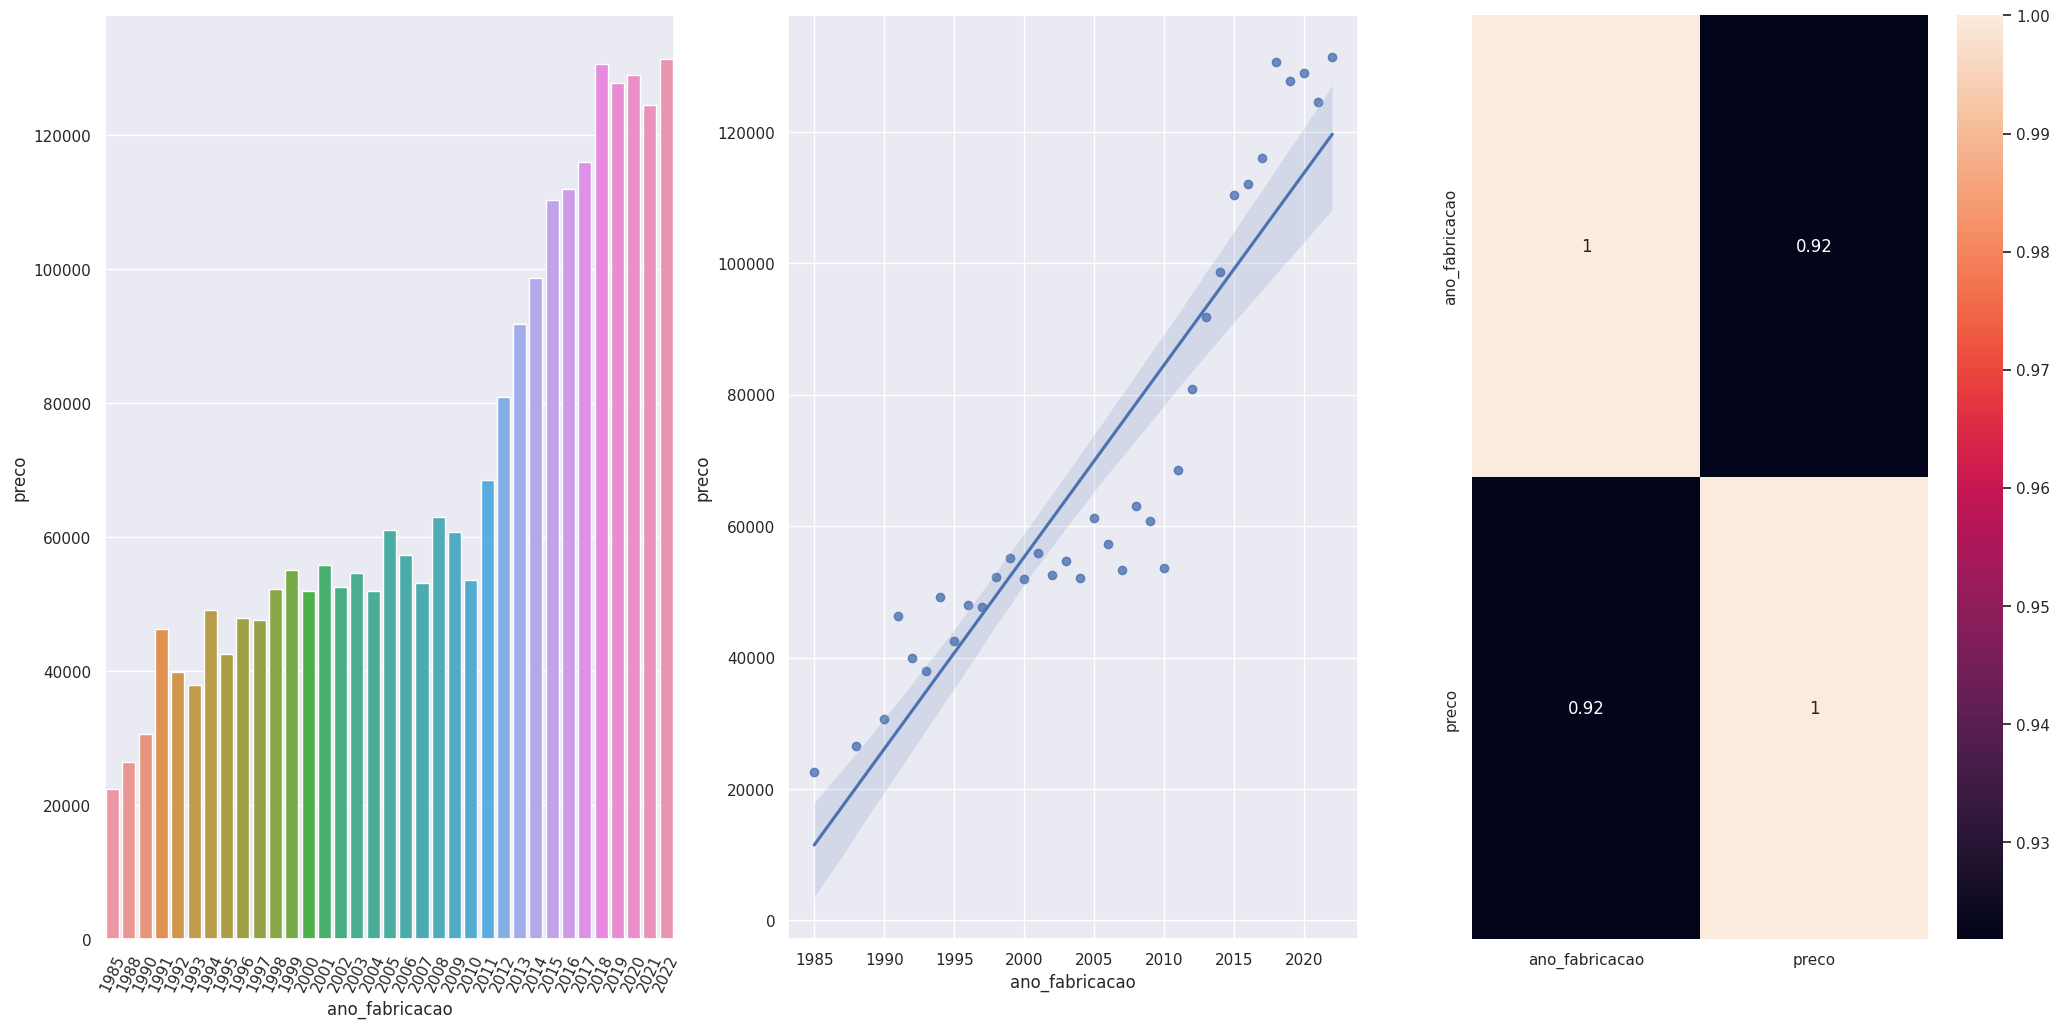

In [280]:
aux1 = df4[['ano_fabricacao', 'preco']].groupby('ano_fabricacao').median().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(aux1, x='ano_fabricacao', y='preco')
plt.xticks(rotation=65)

plt.subplot(1, 3, 2)
sns.regplot(x='ano_fabricacao', y='preco', data=aux1)

plt.subplot(1, 3 , 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H4. Carros com modelos mais recentes (>2015) são mais caros.
**VERDADEIRA.** Carros com modelos MAIS RECENTES (>2014) são MAIS CAROS.

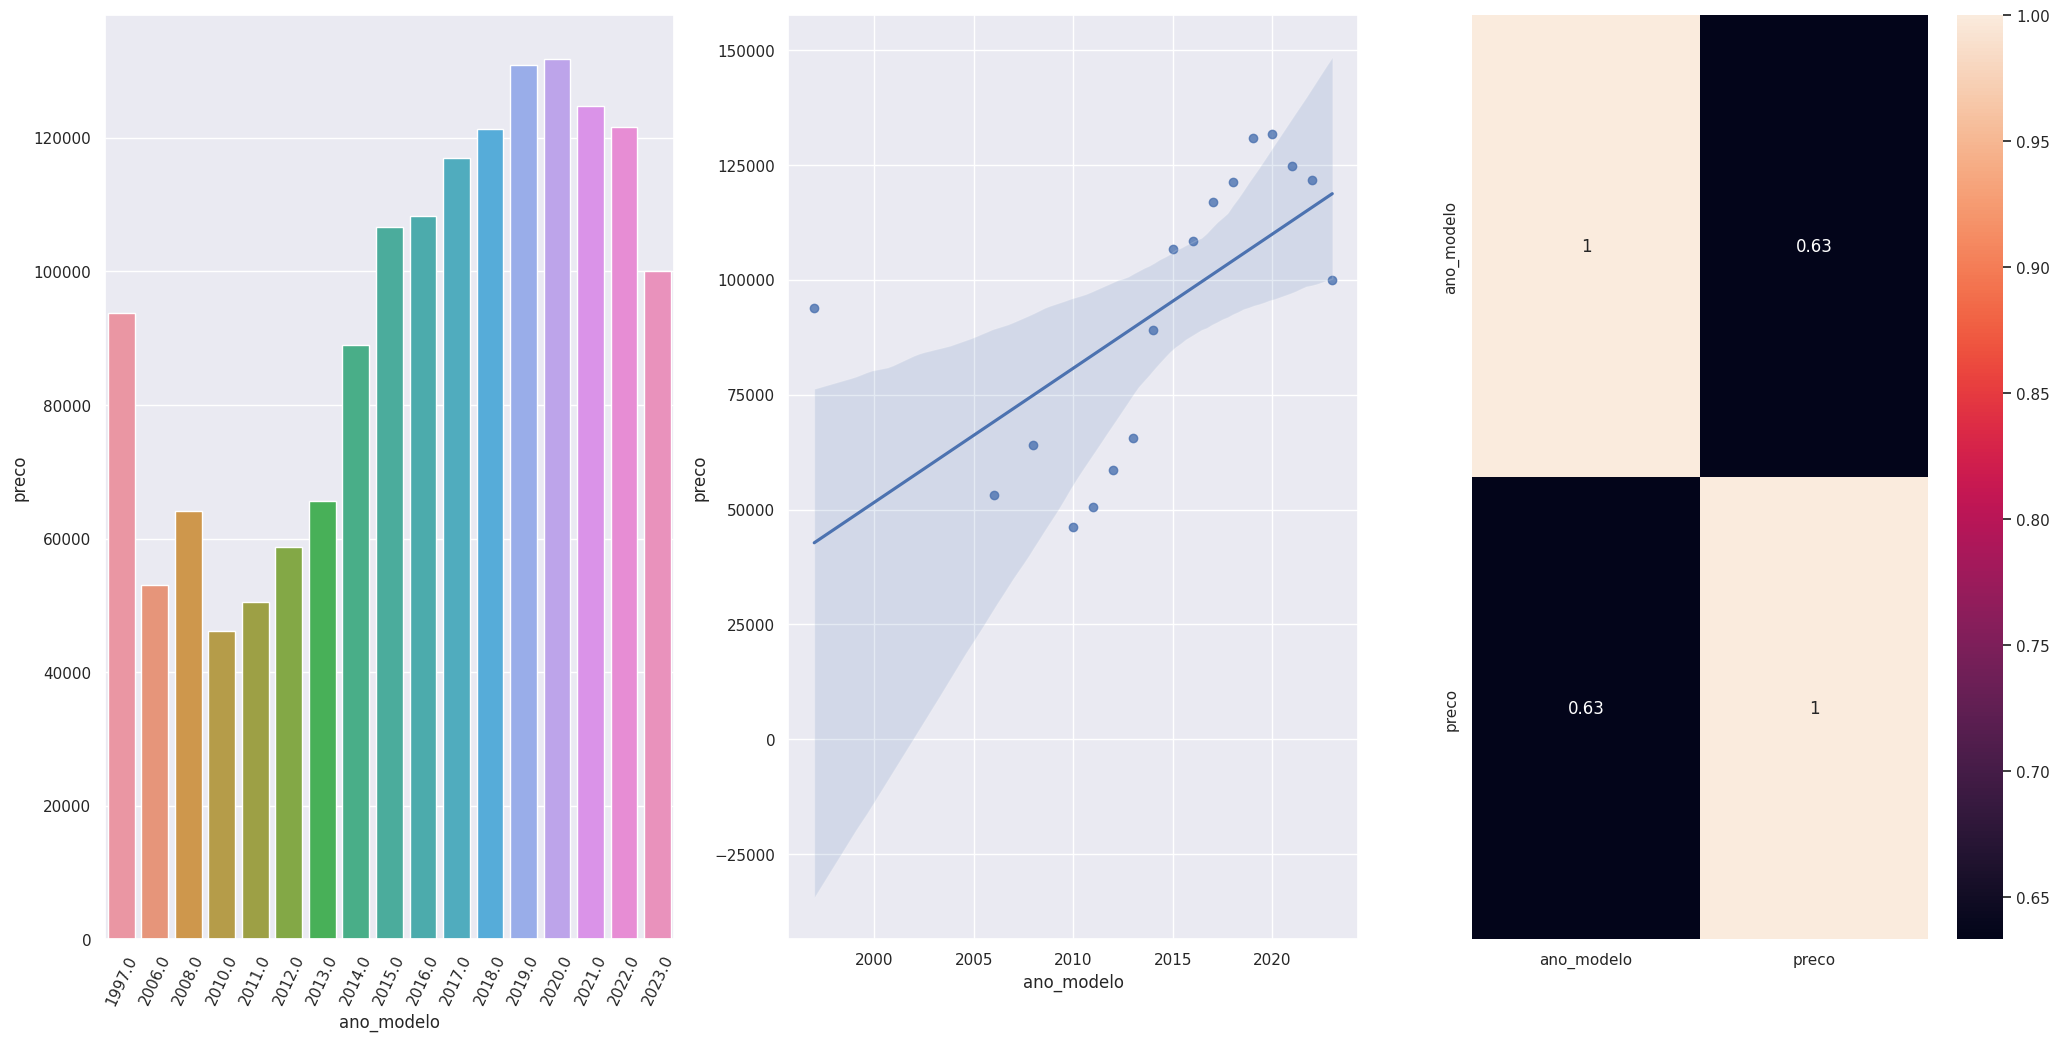

In [281]:
aux1 = df4[['ano_modelo', 'preco']].groupby('ano_modelo').median().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(aux1, x='ano_modelo', y='preco')
plt.xticks(rotation=65)

plt.subplot(1, 3, 2)
sns.regplot(x='ano_modelo', y='preco', data=aux1)

plt.subplot(1, 3 , 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H5. Carros brancos são mais caros.
**FALSA.** Carros BRANCOS não são MAIS CAROS. Carros CINZA e PRETOS são mais caros.

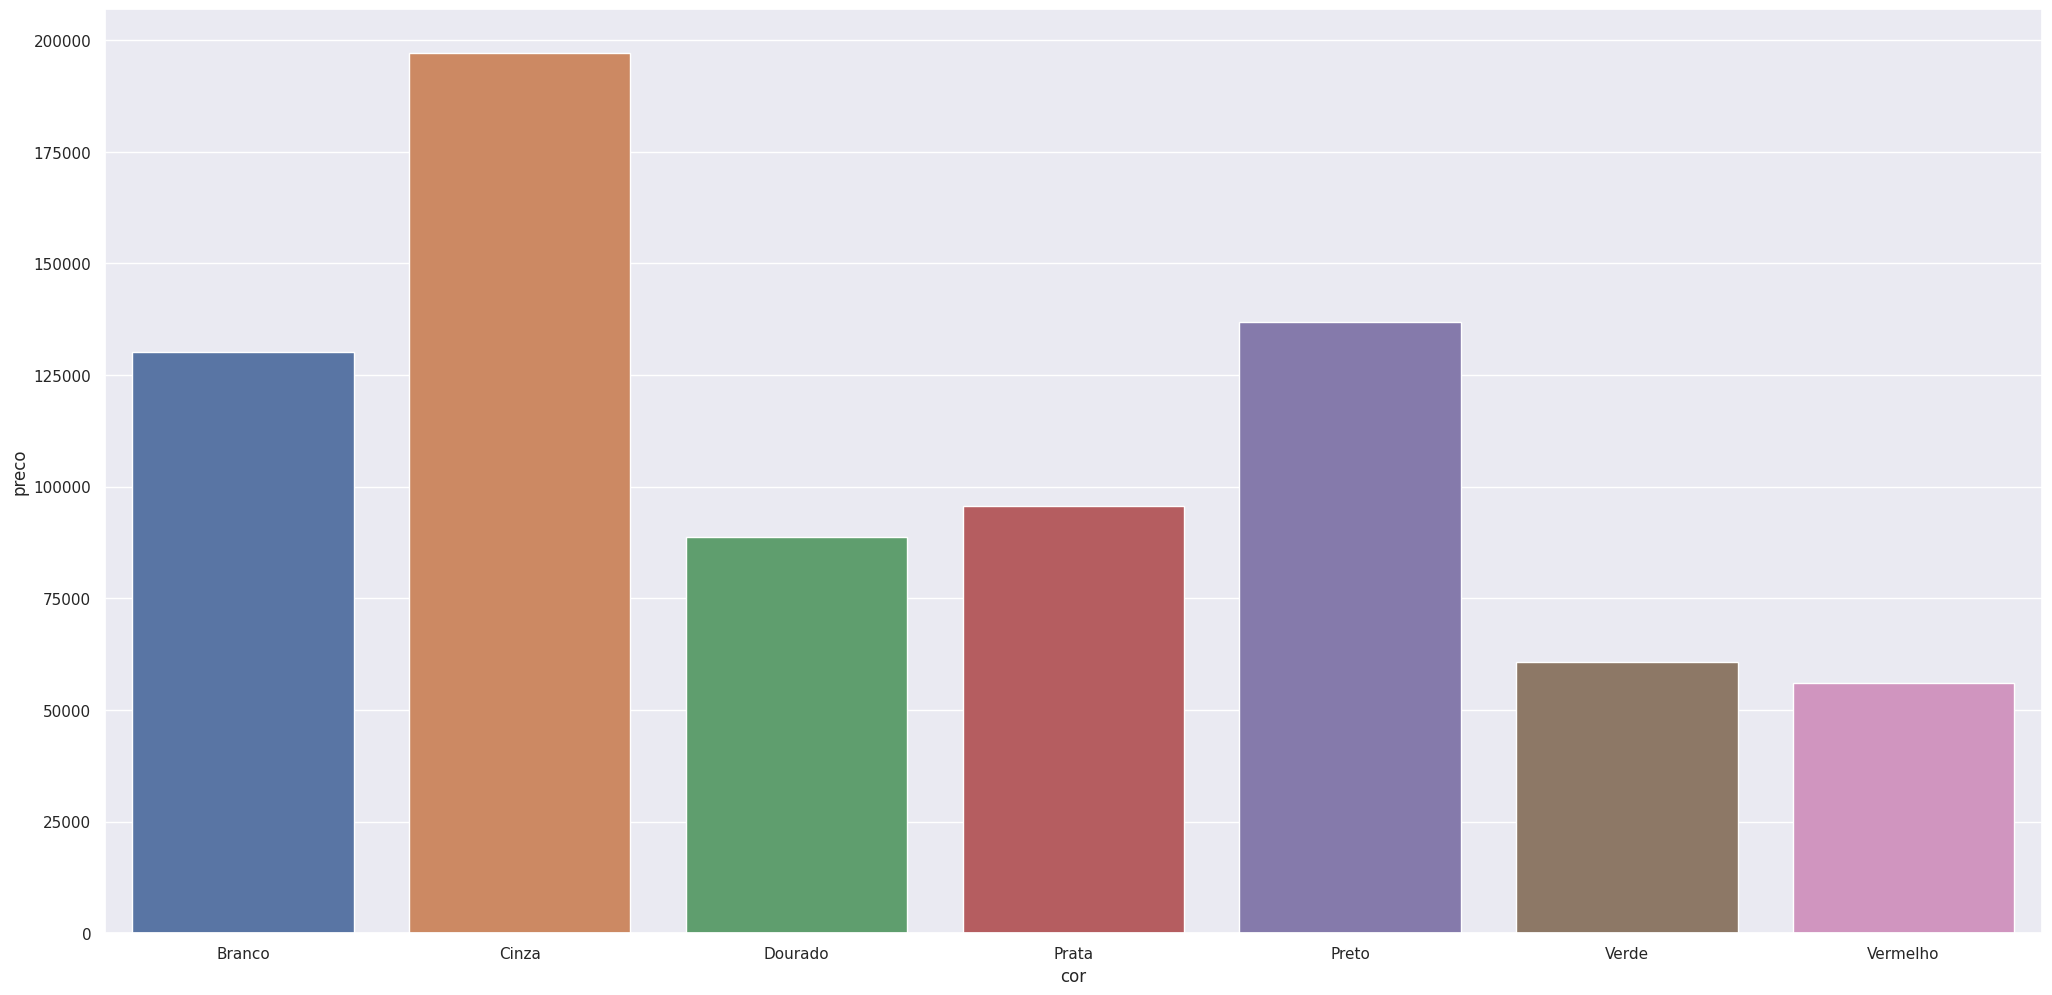

In [262]:
aux1 = df4[['cor', 'preco']].groupby('cor').mean().reset_index()
sns.barplot(aux1, x='cor', y='preco');

### H6. O preço dos veículos é maior no Sudeste.
**FALSA.** O preço dos carros NÃO É MAIOR no SUDESTE. Os maiores estados são SERGIPE e PIAUI.

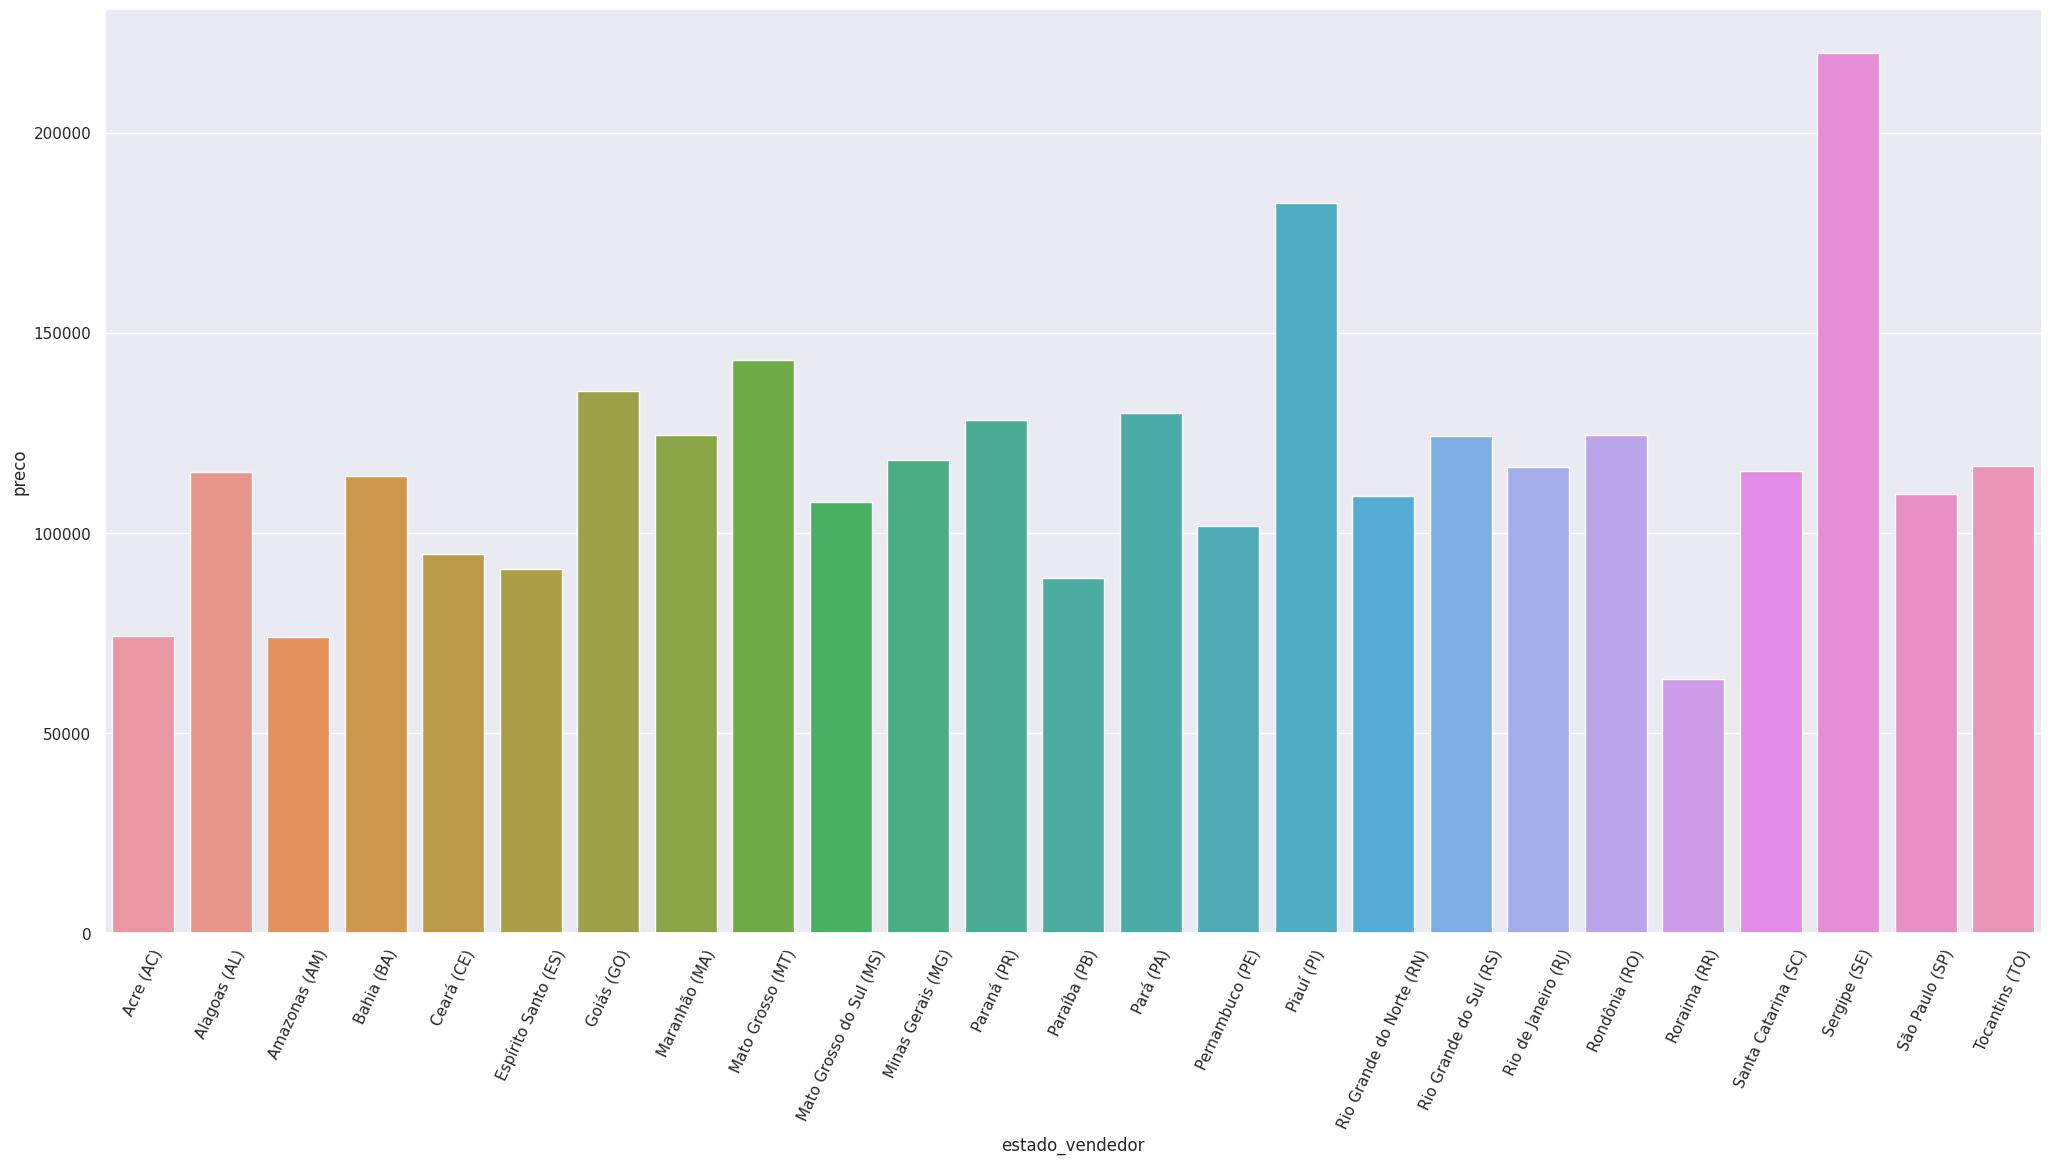

In [270]:
aux1 = df4[['estado_vendedor', 'preco']].groupby('estado_vendedor').median().reset_index()
sns.barplot(aux1, x='estado_vendedor', y='preco')
plt.xticks(rotation=65);

### H7. Caros vendidos por lojas são mais caros.
**FALSA.** Caros vendidos por LOJAS não são MAIS CAROS. Caros vendidos por PESSOAS FÍSICAS são MAIS CAROS.

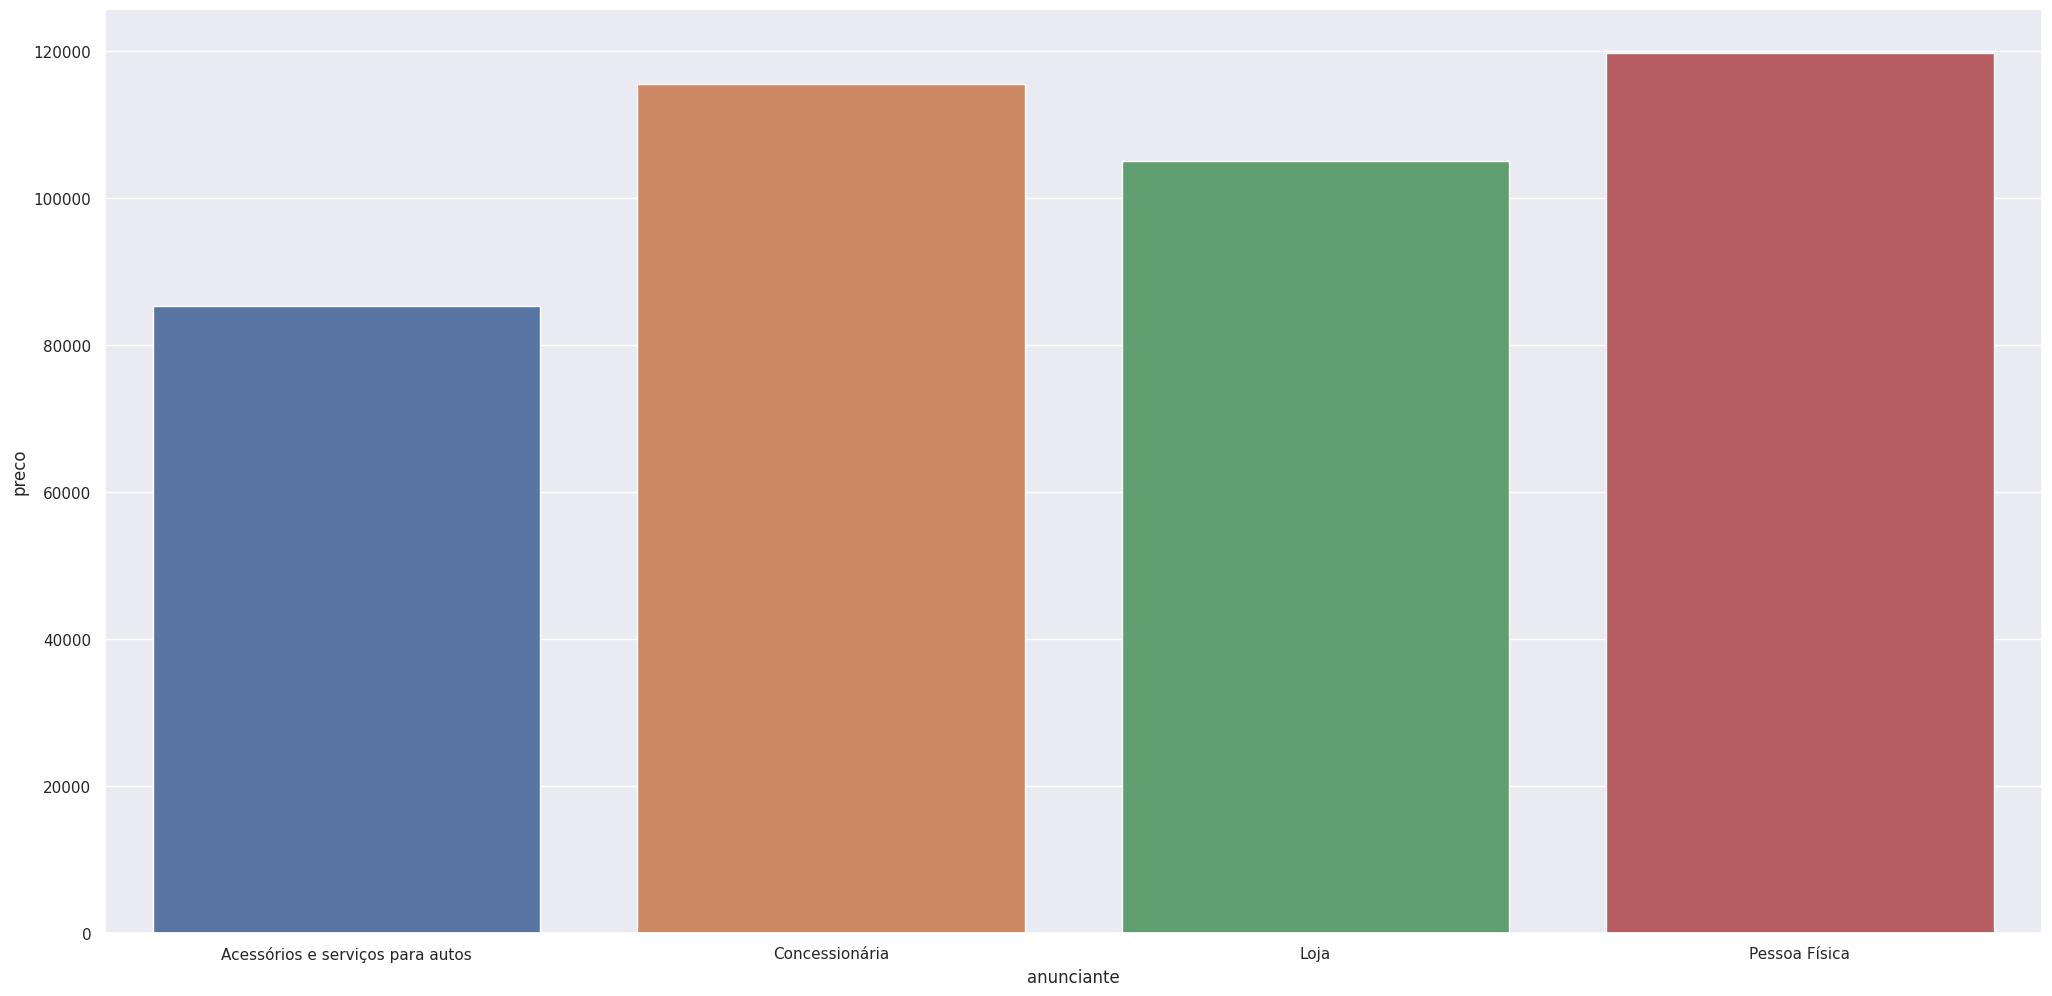

In [276]:
aux1 = df4[['anunciante', 'preco']].groupby('anunciante').median().reset_index()
sns.barplot(aux1, x='anunciante', y='preco');

### H8. Carros com donos únicos são mais caros.
**VERDADEIRA.** Carros com ÚNICOS DONOS são MAIS CAROS.

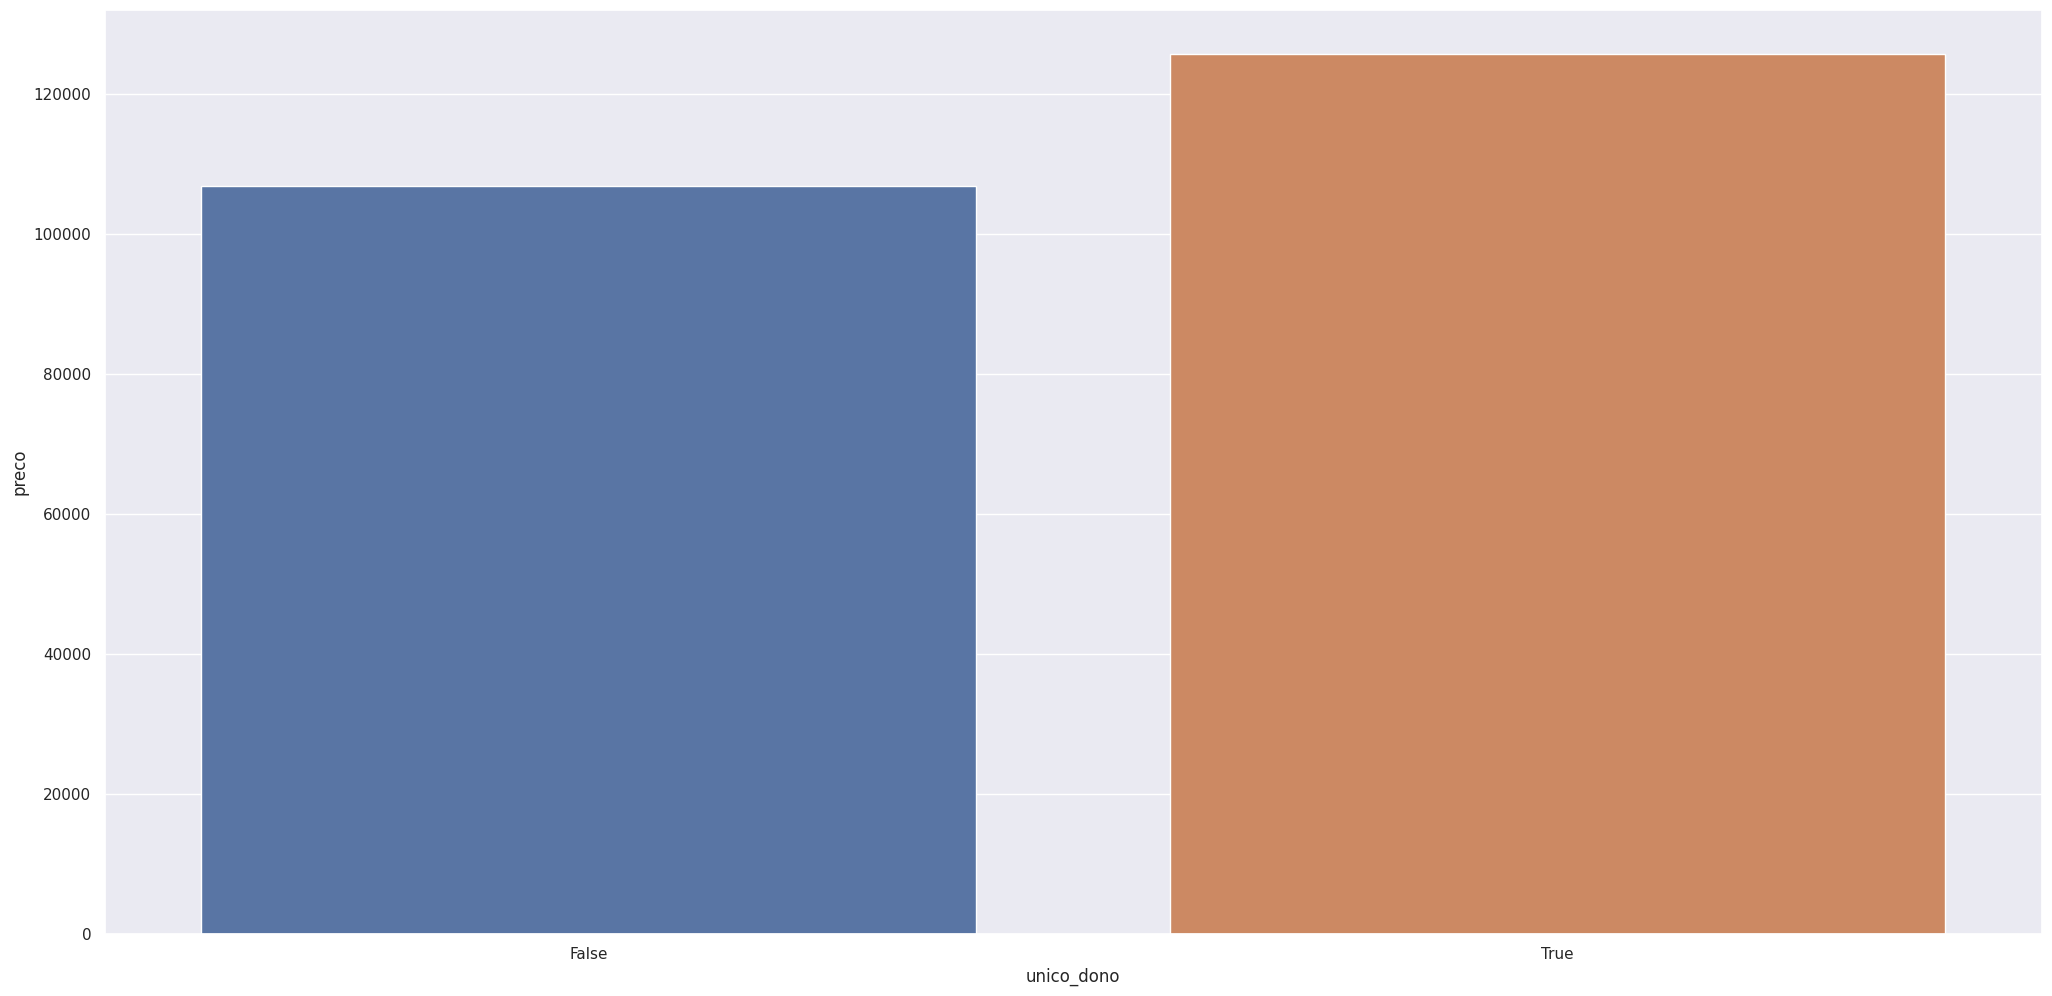

In [278]:
aux1 = df4[['unico_dono', 'preco']].groupby('unico_dono').median().reset_index()
sns.barplot(aux1, x='unico_dono', y='preco');

### H9. Carros com mais quilometragem são mais baratos.
**VERDADEIRA.** Carros com MAIS QUILOMETRAGEM são MAIS CAROS.

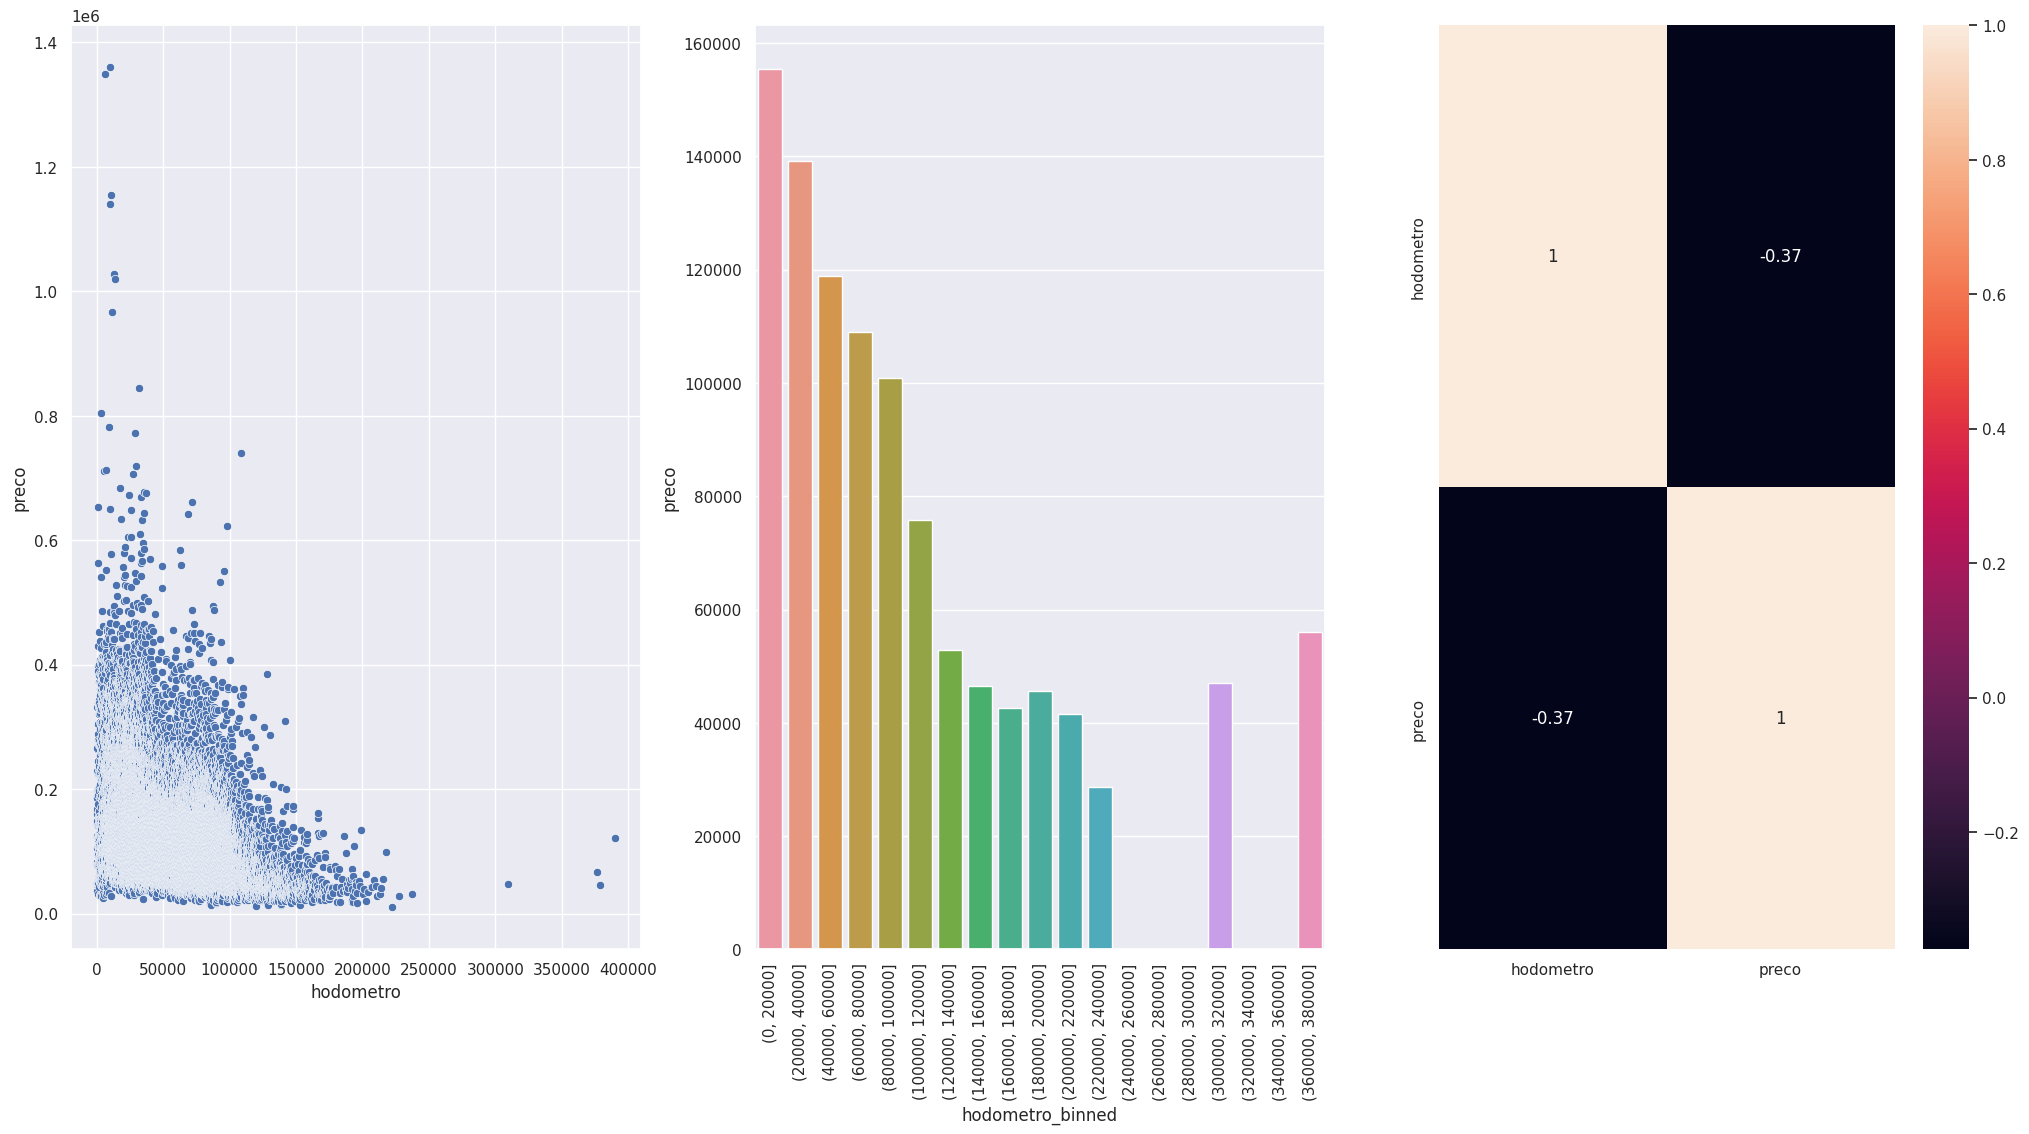

In [52]:
aux1 = df4[['hodometro', 'preco']].groupby('hodometro').mean().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x='hodometro', y='preco', data=aux1)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 400000, 20000))
aux1['hodometro_binned'] = pd.cut(aux1['hodometro'], bins=bins)
aux2 = aux1[['hodometro_binned', 'preco']].groupby('hodometro_binned').median().reset_index()
plt.xticks(rotation=90)

sns.barplot(data=aux2, x='hodometro_binned', y='preco')

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H10. Carros com documentação vencida são mais baratos.
**VERDADEIRA.** Carros com DOCUMENTAÇÃO VENCIDA são MAIS BARATOS.

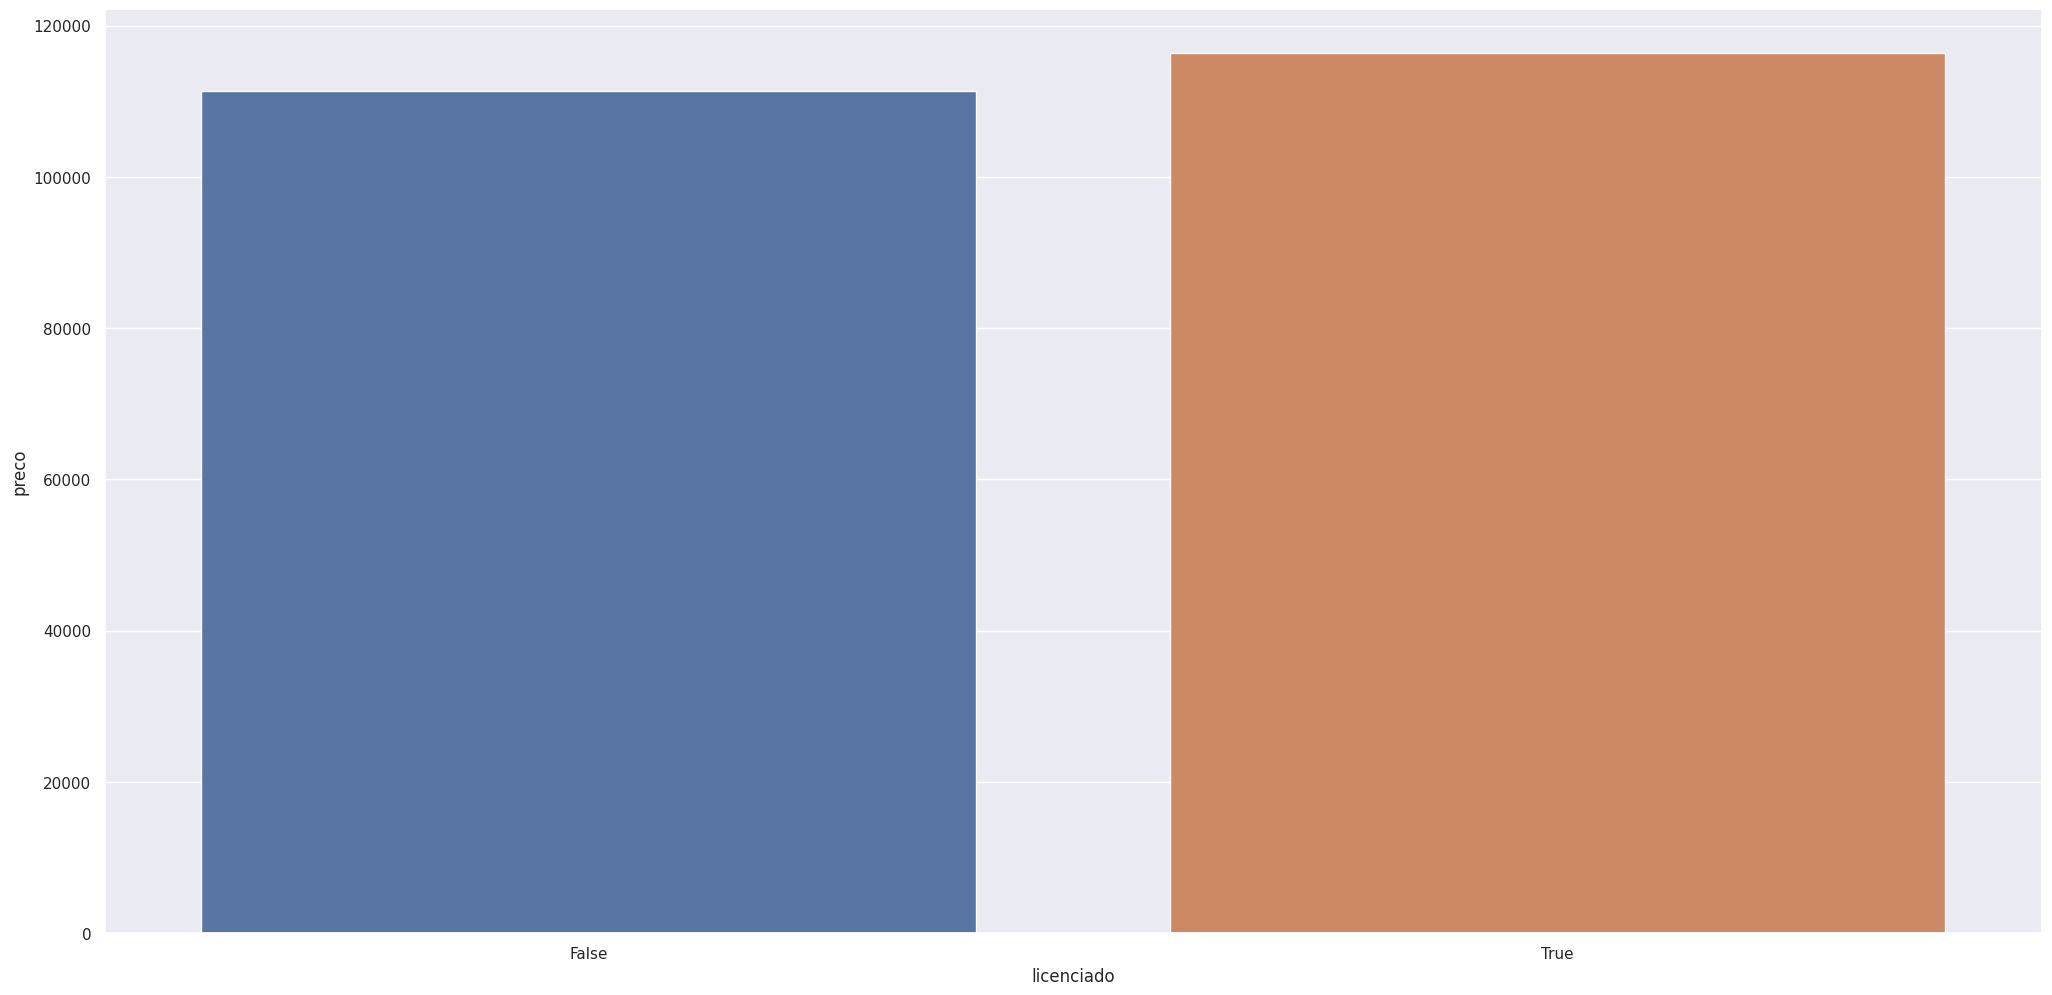

In [295]:
aux1 = df4[['licenciado', 'preco']].groupby('licenciado').median().reset_index()
sns.barplot(aux1, x='licenciado', y='preco');

## Análise Multivariada

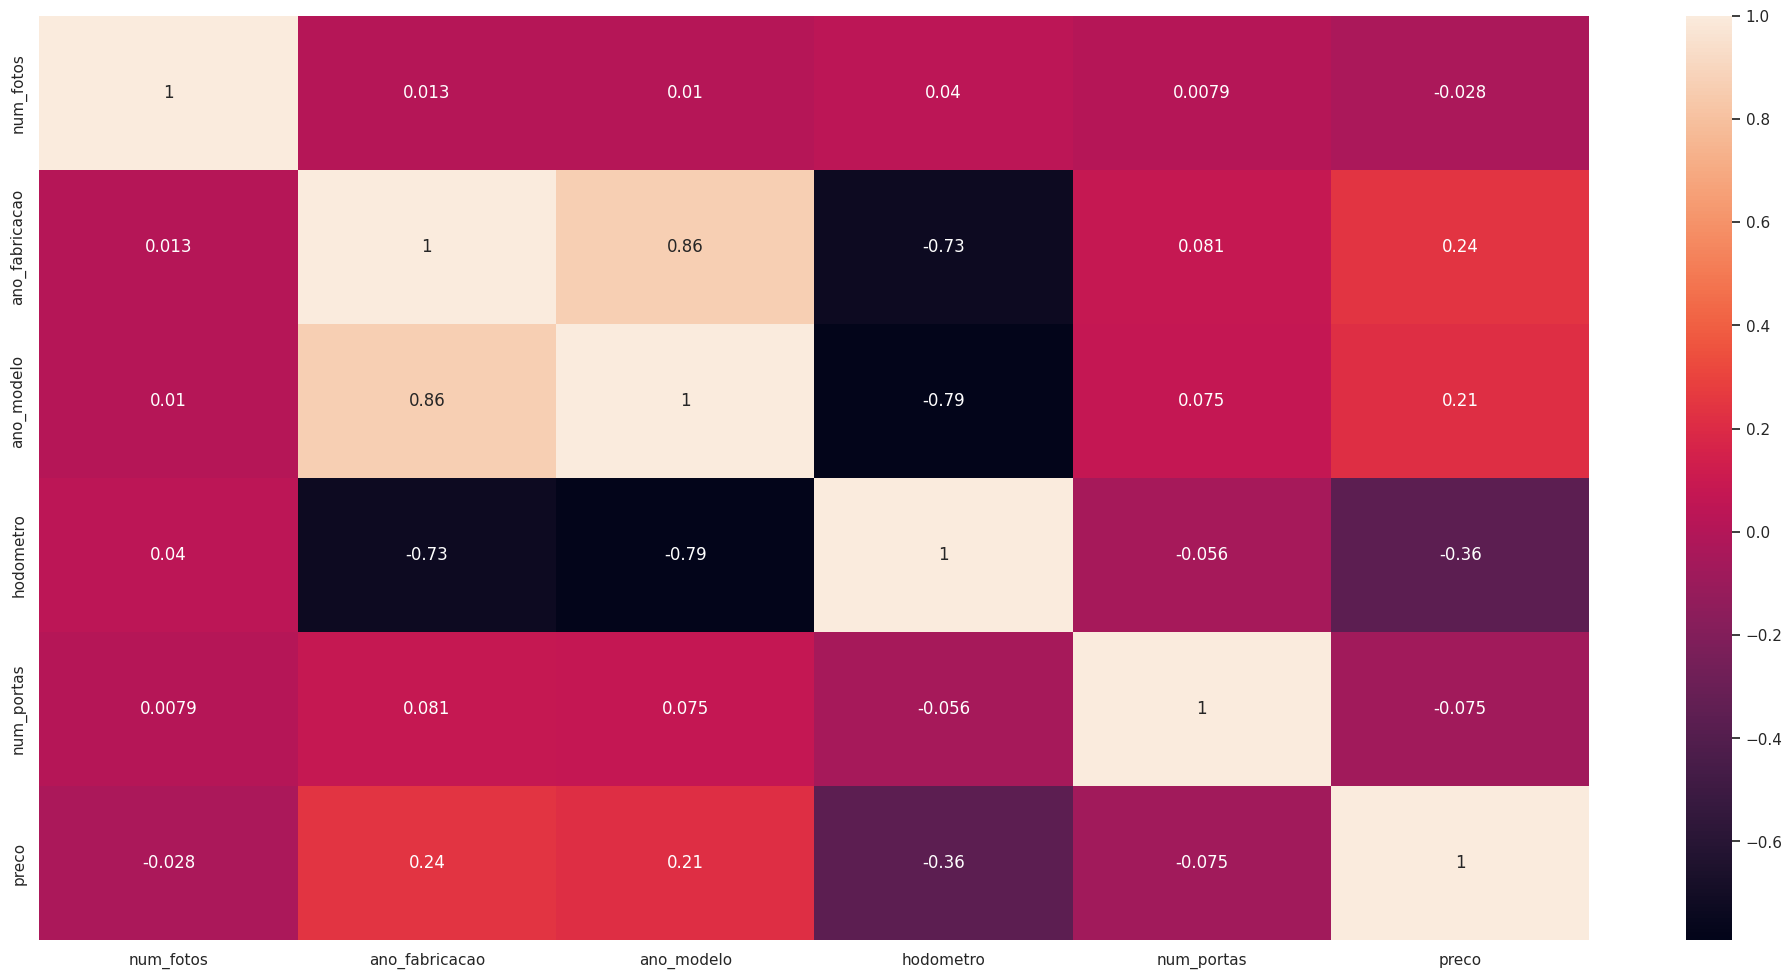

In [296]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

## Perguntas de Negócio

### a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Segundo o site InfoMoney (fonte: https://www.infomoney.com.br/consumo/carros-populares-9-montadoras-com-31-modelos-aderiram-oficialmente-ao-programa-de-descontos-veja-quais/), 34 carros populares são:

* Renault (Kwid, Sandero Stepway, Logan, Duster, Oroch)
* Volkswagen (Gol, Polo, Virtus, T-Cross, Saveiro)
* Toyota (Yaris e Yaris sedã)
* Hyundai (HB20 e HB20S)
* Nissan (Kicks)
* Honda (City sedã)
* GM/Chevrolet (Onix, Onix Plus, Spin, Montana, Tracker)
* Fiat (Mobi, Argo, Cronos, Strada, Pulse, Fiorino, Fastback)
* Jeep (Renegade)
* Peugeot (208, 2008, Partner Rapid)
* Citroën (C3 e C4 Cactus)

In [6]:
car_list = ('KWID', 'SANDERO STEPWAY', 'LOGAN', 'DUSTER', 'ORACH', 'GOL', 'POLO', 'VIRTUS', 'T-CROSS', 'SAVEIRO', 'YARIS', 'HB20', 'HB20S', 'KICKS', 'CITY', 'ONIX', 'ONIX PLUS', 'SPIN', 'MONTANA', 'TRACKER', 'MOBI', 'ARGO', 'CRONOS', 'STRADA', 'PULSE', 'FIORINO', 'FASTBACK', 'RENEGADE', '208', '2008', 'PARTNER RAPID', 'C3', 'C4 CACTUS')

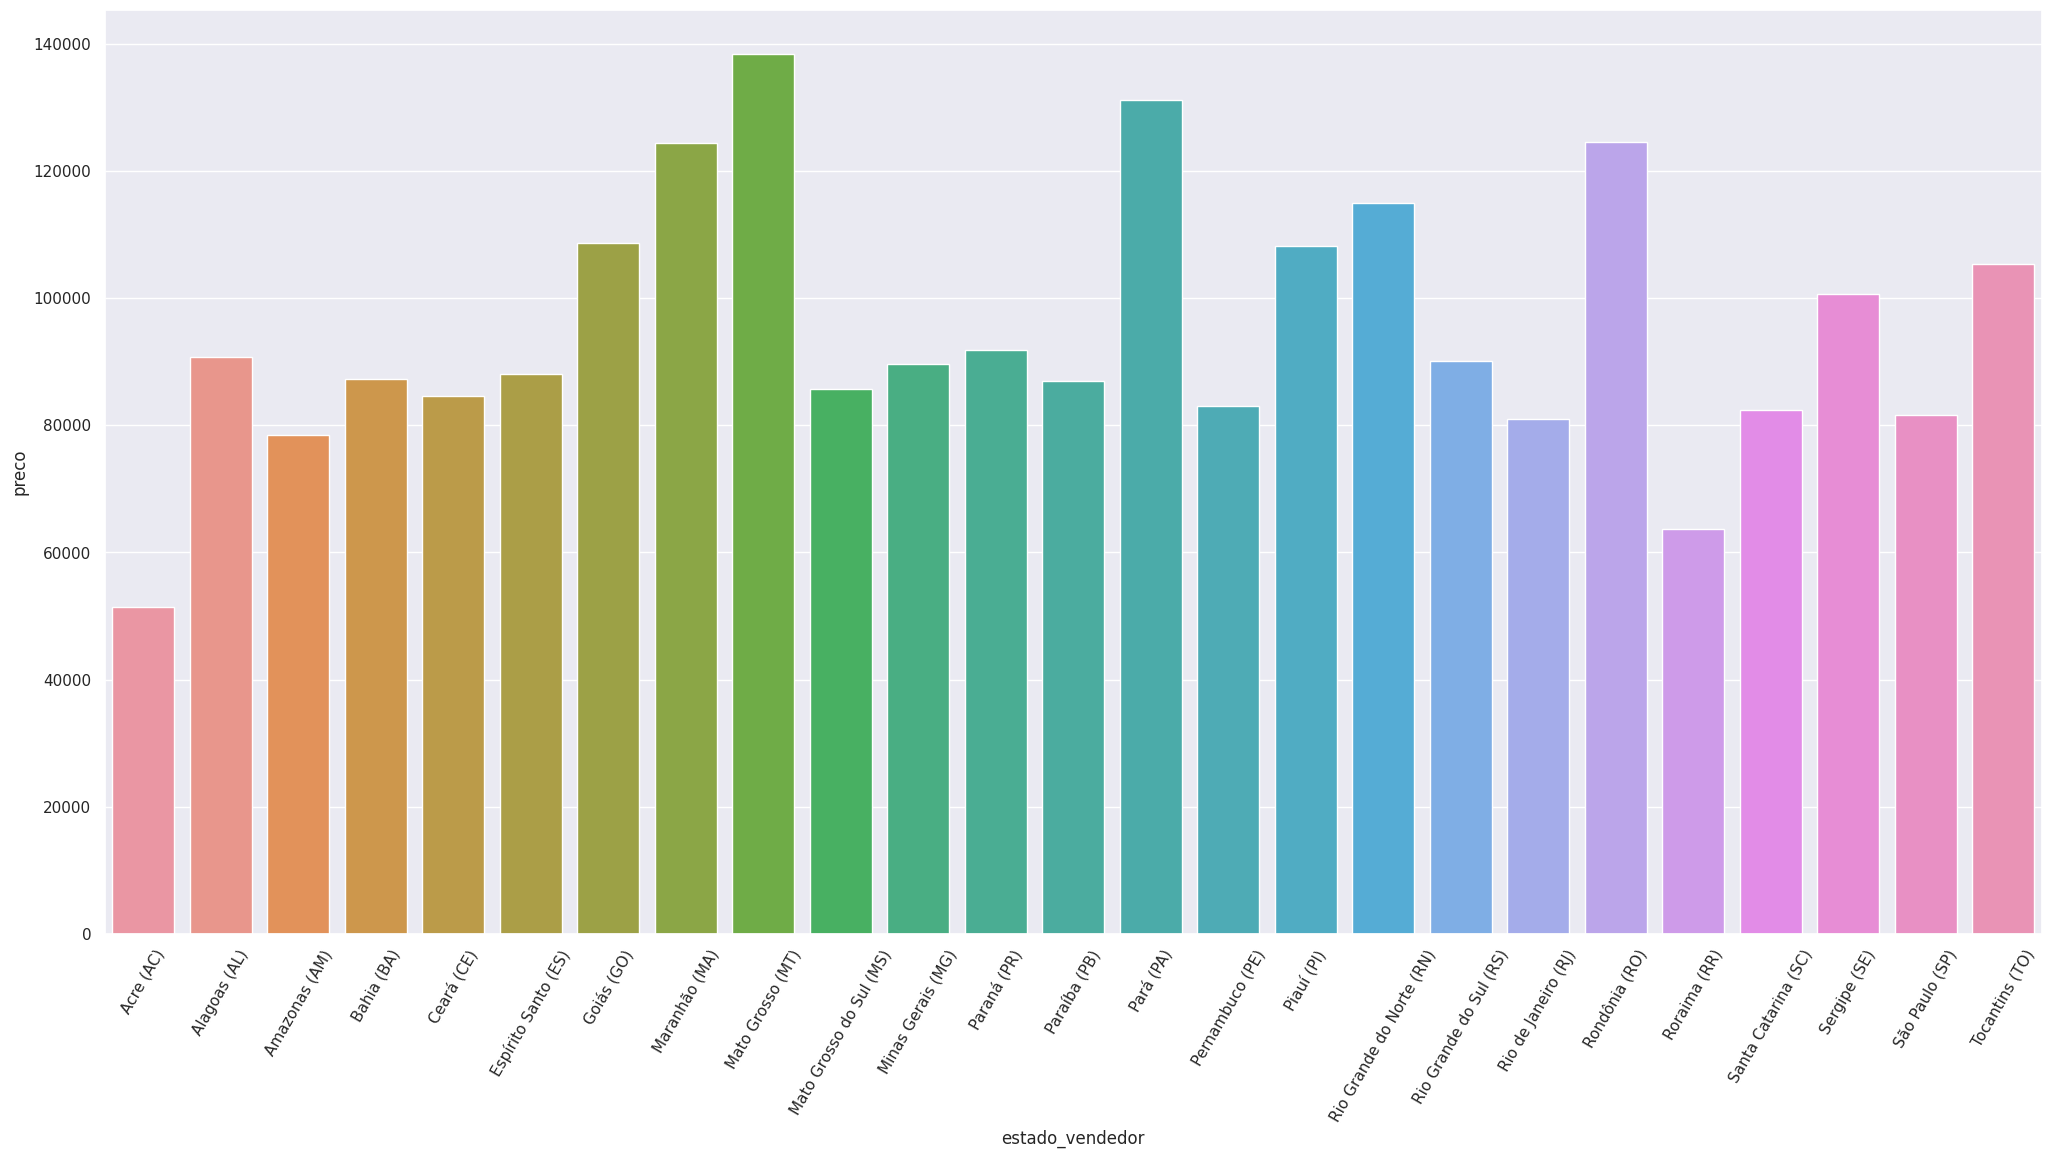

In [25]:
aux = df4[df4['modelo'].isin(car_list)].groupby('estado_vendedor').median().reset_index()
sns.barplot(aux, x='estado_vendedor', y='preco')
plt.xticks(rotation=60);

O melhor estado para vender um carro de marca popular é Mato Grosso (MT), apresentando um valor de preço mediano acima das outras regiões.

### b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

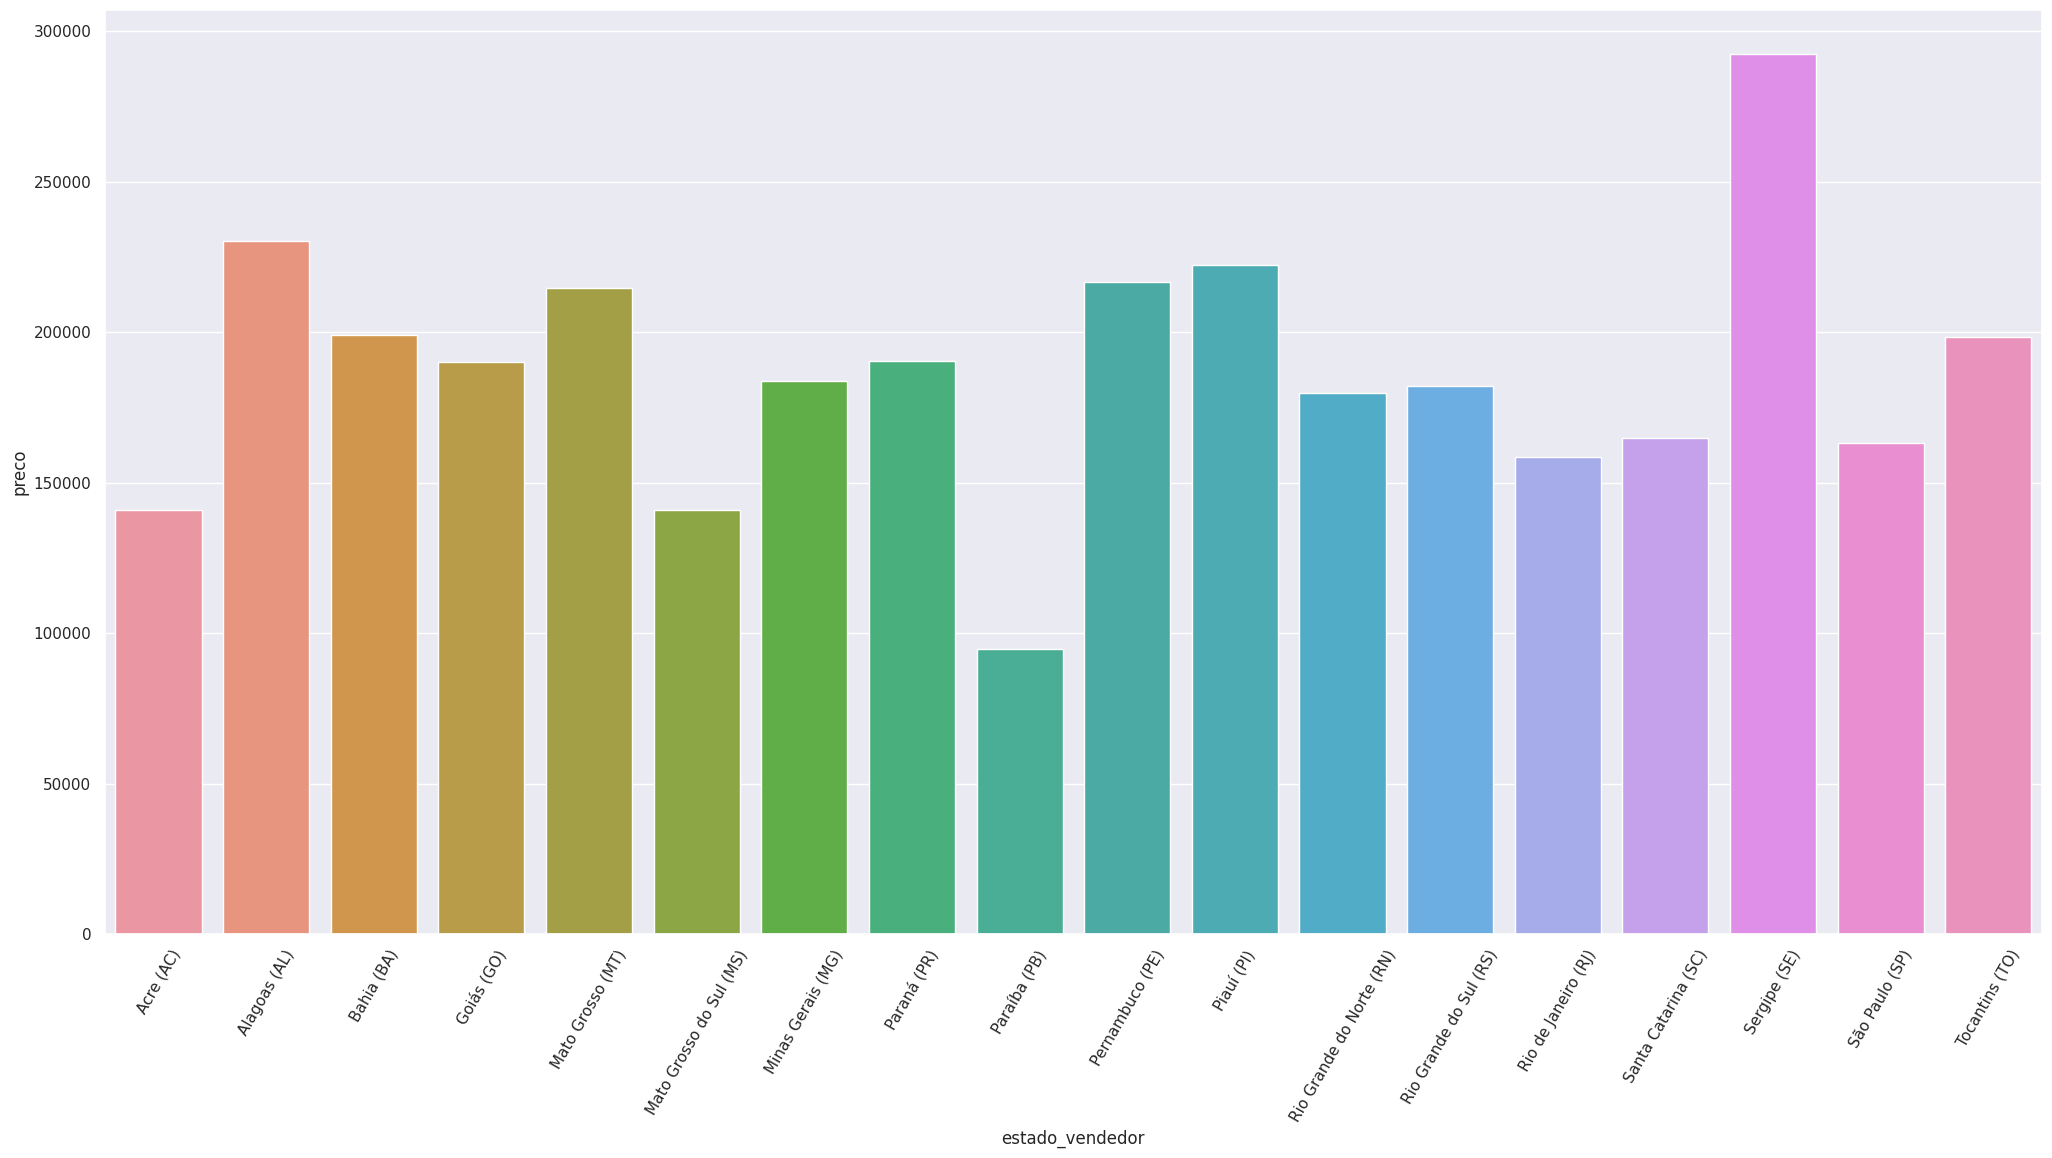

In [38]:
aux = df4[(df4['tipo'] == 'Picape') & (df4['cambio'] == 'Automática')].groupby('estado_vendedor').median().reset_index()
sns.barplot(aux, x='estado_vendedor', y='preco')
plt.xticks(rotation=60);

O melhor estado para comprar uma picape é Paraíba, apresentando um valor de preço mediano abaixo das outras regiões.

### c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

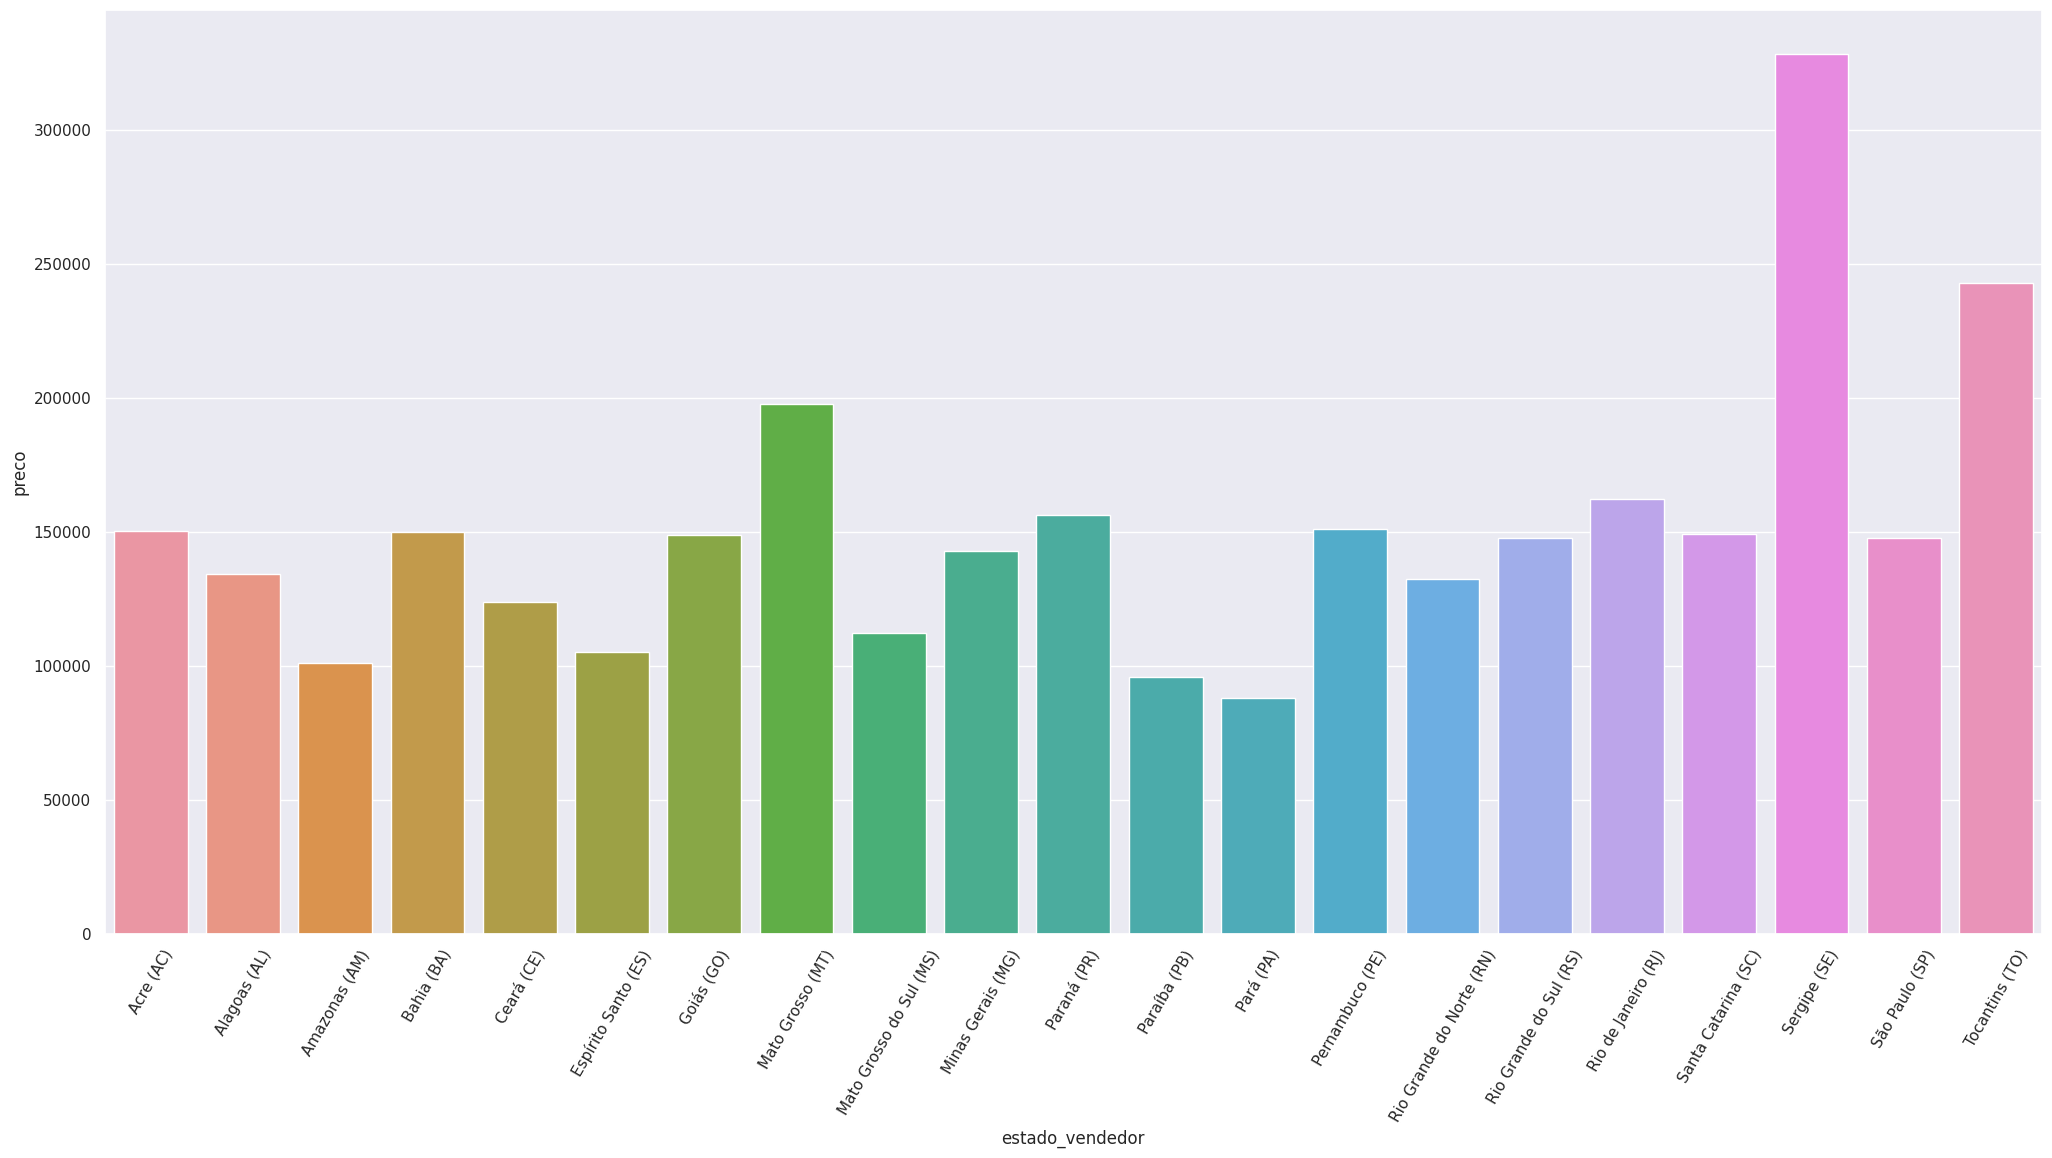

In [47]:
aux = df4[df4['garantia_fabrica']].groupby('estado_vendedor').median().reset_index()

sns.barplot(aux, x='estado_vendedor', y='preco')
plt.xticks(rotation=60);

O melhor estado para comprar carros dentro da garantia de fábrica é Pará (PA), apresentando um valor de preço mediano abaixo das outras regiões.